In [81]:
import matplotlib.pyplot as plt
import pandas as pd
shark_data = pd.read_csv('data/Alex_Kinda_clean_data.csv', encoding = "ISO-8859-1")

In [82]:
shark_data.head()

,Unnamed: 0,Type,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Proper_date,Full Location,latitude,longitude,avg_temp,precipitation,wind_speed,sea_level_pressure
0,0,Unprovoked,surfing,M,6,Minor injury to right arm,N,1320,Not Determined,20210909,"USA Florida Ponce Inlet, Volusia County",29.096373,-80.936998,26.1,1.0,16.2,1012.5
1,1,Unprovoked,surfing,M,31,FATAL,Y,1030,White xhark,20210905,AUSTRALIA New South Wales Emerald Beach,-30.157479,153.150195,13.6,4.6,20.4,1017.3
2,2,Unprovoked,boarding,M,27,Lacerations both sides of lower leg immediatel...,N,1145,Not Determined,20210828,"USA Texas Galveston Island, Galveston County",29.241005,-94.909133,29.4,2.5,10.4,1013.7
3,3,Unprovoked,fell,M,64,Severe injury to leg,N,1400,Not Determined,20210903,USA Louisiana off Grand Isle,29.236617,-89.987294,27.2,3.9,5.1,1014.6
4,4,Unprovoked,surfing,M,41,Left ankle and foot bitten,N,0640,Bull shark,20210821,"USA Florida Walton Beach Psrk, St. Lucie County",27.337890,-80.233431,28.9,0.2,11.0,1015.0


In [83]:
shark_data_prov = shark_data[shark_data["Type"] == "Provoked"]
shark_data_unprov = shark_data[shark_data["Type"] == "Unprovoked"]

In [89]:
shark_data_prov["Activity"].value_counts(normalize=True)

fishing         0.418182
spearfishing    0.111364
diving          0.061364
no activity     0.047727
0               0.034091
                  ...   
pulled          0.002273
rowing          0.002273
cleaning        0.002273
tossing         0.002273
shooting        0.002273
Name: Activity, Length: 81, dtype: float64

In [90]:
shark_data_unprov["Activity"].value_counts(normalize=True)

surfing         0.283279
swimming        0.193452
spearfishing    0.068994
diving          0.066558
no activity     0.051136
                  ...   
thrashing       0.000271
exercising      0.000271
surfacing       0.000271
racing          0.000271
sailing         0.000271
Name: Activity, Length: 148, dtype: float64

In [91]:
shark_data_prov["Fatal (Y/N)"].value_counts(normalize=True)

N    0.977273
Y    0.022727
Name: Fatal (Y/N), dtype: float64

In [92]:
shark_data_unprov["Fatal (Y/N)"].value_counts(normalize=True)

N    0.810606
Y    0.189394
Name: Fatal (Y/N), dtype: float64

In [65]:
shark_data = shark_data[['Type', 'avg_temp', 'precipitation', 'wind_speed', 'sea_level_pressure']]
shark_data = shark_data.dropna()

In [66]:
shark_data_prov = shark_data[shark_data["Type"] == "Provoked"]
shark_data_unprov = shark_data[shark_data["Type"] == "Unprovoked"]

In [67]:
shark_data_prov.head()

,Type,avg_temp,precipitation,wind_speed,sea_level_pressure
6,Provoked,16.5,9.165706,11.2,1024.3
11,Provoked,27.5,2.100000,9.6,1017.0
14,Provoked,74.4,9.165706,10.8,1013.7
17,Provoked,28.7,2.800000,12.4,1008.0
34,Provoked,17.7,9.165706,13.2,1023.3


In [68]:
from sklearn import preprocessing
from pandas import DataFrame

shark_data_prov_nrml = shark_data_prov.drop(["Type"], 1)

scaler = preprocessing.StandardScaler().fit(shark_data_prov_nrml)
print("scaler mean: ", scaler.mean_)
print("scaler scale: ", scaler.scale_)

train_scaled = scaler.transform(shark_data_prov_nrml)

shark_data_prov_nrml = DataFrame(train_scaled)
shark_data_prov_nrml.columns = ['avg_temp', 'precipitation', 'wind_speed', 'sea_level_pressure']

print("train data: \n", shark_data_prov)
print("scaled train data: \n", shark_data_prov_nrml)

scaler mean:  [  23.82439805    9.10649227   12.48355043 1016.07709081]
scaler scale:  [5.17514236 4.63797169 2.73513836 1.851011  ]
train data: 
           Type   avg_temp  precipitation  wind_speed  sea_level_pressure
6     Provoked  16.500000       9.165706   11.200000         1024.300000
11    Provoked  27.500000       2.100000    9.600000         1017.000000
14    Provoked  74.400000       9.165706   10.800000         1013.700000
17    Provoked  28.700000       2.800000   12.400000         1008.000000
34    Provoked  17.700000       9.165706   13.200000         1023.300000
...        ...        ...            ...         ...                 ...
4084  Provoked  24.041156       9.165706   12.665634         1016.229106
4086  Provoked  24.041156       9.165706   12.665634         1016.229106
4117  Provoked  24.041156       9.165706   12.665634         1016.229106
4118  Provoked  24.041156       9.165706   12.665634         1016.229106
4134  Provoked  24.041156       9.165706   12.6656

C:\Users\joshu\AppData\Local\Temp/ipykernel_13268/1658716525.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  shark_data_prov_nrml = shark_data_prov.drop(["Type"], 1)


In [69]:
from sklearn import preprocessing
from pandas import DataFrame

shark_data_unprov_nrml = shark_data_unprov.drop(["Type"], 1)

scaler = preprocessing.StandardScaler().fit(shark_data_unprov_nrml)
print("scaler mean: ", scaler.mean_)
print("scaler scale: ", scaler.scale_)

train_scaled = scaler.transform(shark_data_unprov_nrml)

shark_data_unprov_nrml = DataFrame(train_scaled)
shark_data_unprov_nrml.columns = ['avg_temp', 'precipitation', 'wind_speed', 'sea_level_pressure']

print("train data: \n", shark_data_unprov)
print("scaled train data: \n", shark_data_unprov_nrml)

scaler mean:  [  24.04584989    9.17275482   12.68731018 1016.24720308]
scaler scale:  [5.14586889 7.33532778 3.57250271 2.06441587]
train data: 
             Type   avg_temp  precipitation  wind_speed  sea_level_pressure
0     Unprovoked  26.100000       1.000000   16.200000         1012.500000
1     Unprovoked  13.600000       4.600000   20.400000         1017.300000
2     Unprovoked  29.400000       2.500000   10.400000         1013.700000
3     Unprovoked  27.200000       3.900000    5.100000         1014.600000
4     Unprovoked  28.900000       0.200000   11.000000         1015.000000
...          ...        ...            ...         ...                 ...
4130  Unprovoked  24.041156       9.165706   12.665634         1016.229106
4131  Unprovoked  24.041156       9.165706   12.665634         1016.229106
4132  Unprovoked  24.041156       9.165706   12.665634         1016.229106
4133  Unprovoked  24.041156       9.165706   12.665634         1016.229106
4135  Unprovoked  24.041156 

C:\Users\joshu\AppData\Local\Temp/ipykernel_13268/695097991.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  shark_data_unprov_nrml = shark_data_unprov.drop(["Type"], 1)


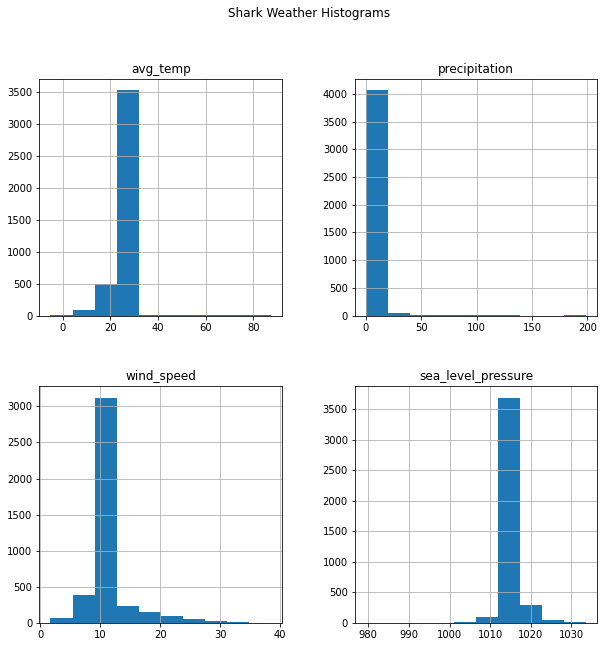

In [70]:
shark_data.hist(figsize=(10, 10))
plt.suptitle("Shark Weather Histograms")
plt.savefig("img/unnormalized_shark_histograms")

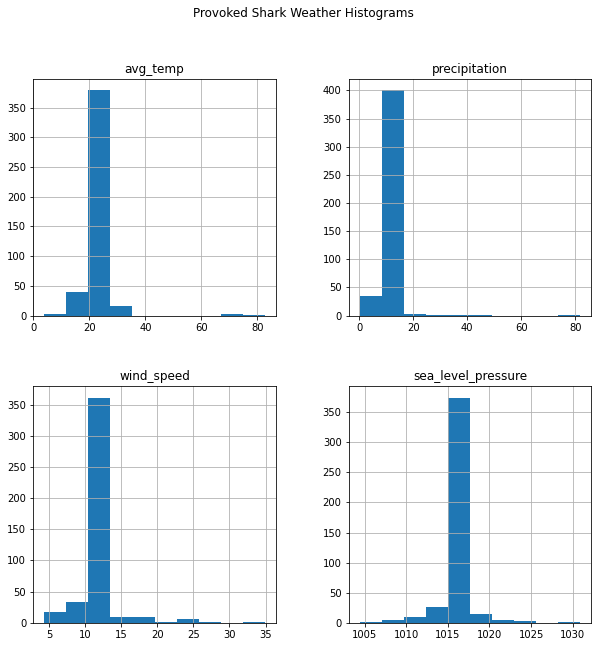

In [71]:
shark_data_prov.hist(figsize=(10, 10))
plt.suptitle("Provoked Shark Weather Histograms")
plt.savefig("img/unnormalized_prov_shark_histograms")

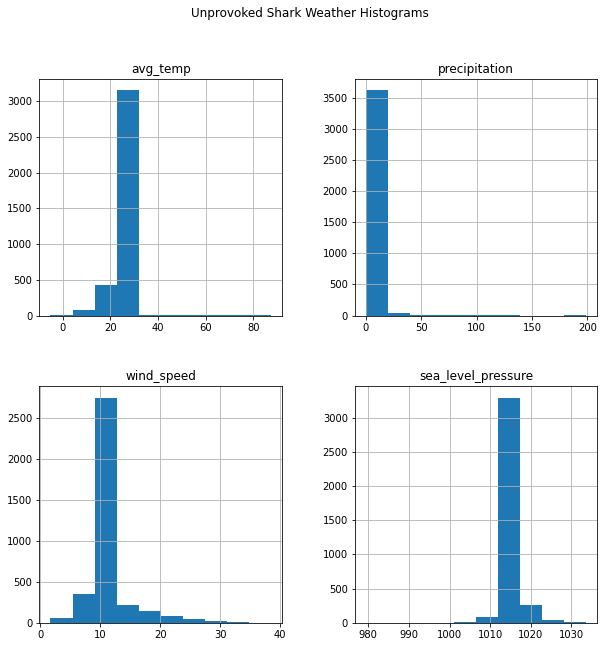

In [72]:
shark_data_unprov.hist(figsize=(10, 10))
plt.suptitle("Unprovoked Shark Weather Histograms")
plt.savefig("img/unnormalized_unprov_shark_histograms")

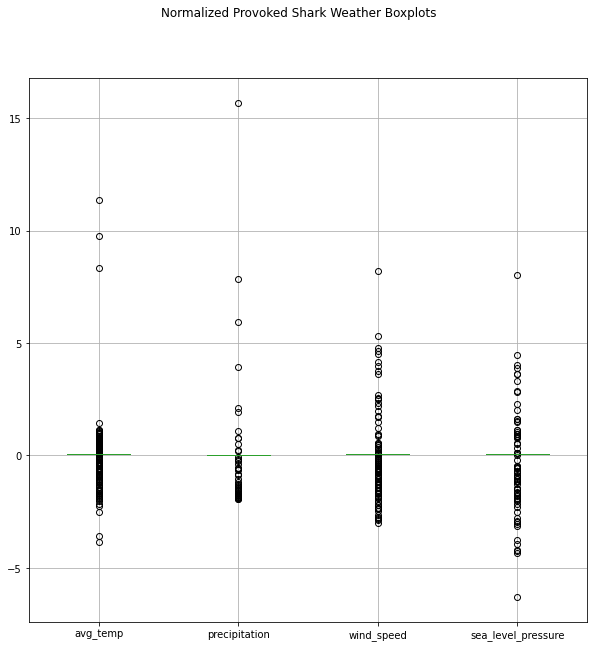

In [73]:
shark_data_prov_nrml.boxplot(figsize=(10, 10))
plt.suptitle("Normalized Provoked Shark Weather Boxplots")
plt.savefig("img/normalized_prov_shark_boxplots")

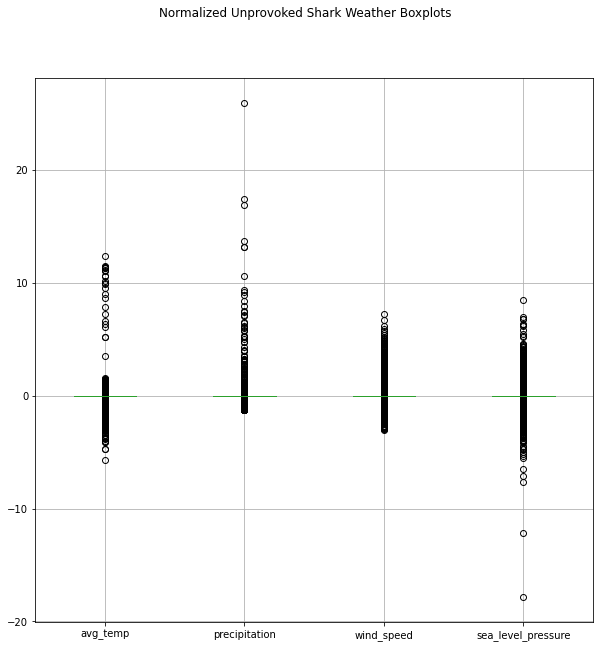

In [74]:
shark_data_unprov_nrml.boxplot(figsize=(10, 10))
plt.suptitle("Normalized Unprovoked Shark Weather Boxplots")
plt.savefig("img/normalized_unprov_shark_boxplots")

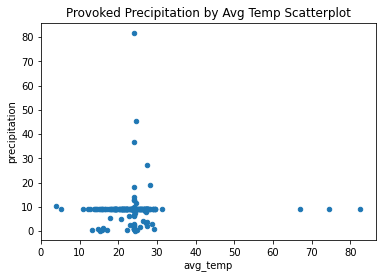

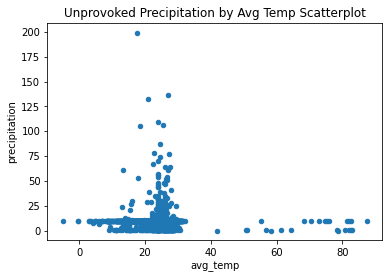

In [75]:
shark_data_prov.plot(kind='scatter', x="avg_temp", y="precipitation")
plt.title("Provoked Precipitation by Avg Temp Scatterplot")
plt.savefig("img/unnormalized_prov_shark_scatterplots_temp_precip")
shark_data_unprov.plot(kind='scatter', x="avg_temp", y="precipitation")
plt.title("Unprovoked Precipitation by Avg Temp Scatterplot")
plt.savefig("img/unnormalized_unprov_shark_scatterplots_temp_precip")

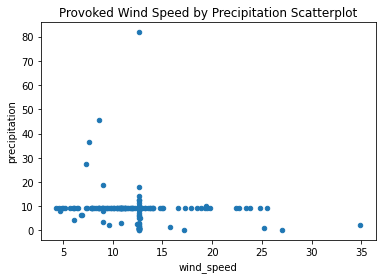

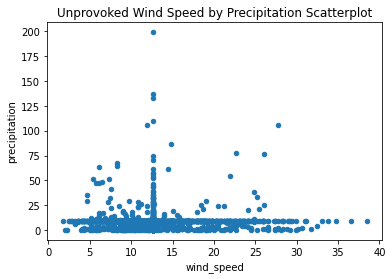

In [76]:
shark_data_prov.plot(kind='scatter', x="wind_speed", y="precipitation")
plt.title("Provoked Wind Speed by Precipitation Scatterplot")
plt.savefig("img/unnormalized_prov_shark_scatterplots_wspd_precip")
shark_data_unprov.plot(kind='scatter', x="wind_speed", y="precipitation")
plt.title("Unprovoked Wind Speed by Precipitation Scatterplot")
plt.savefig("img/unnormalized_unprov_shark_scatterplots_wspd_precip")

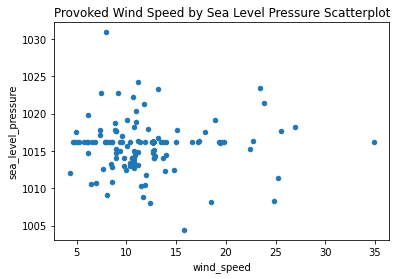

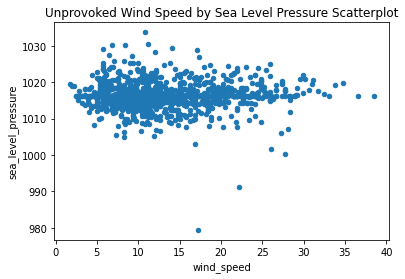

In [77]:
shark_data_prov.plot(kind='scatter', x="wind_speed", y="sea_level_pressure")
plt.title("Provoked Wind Speed by Sea Level Pressure Scatterplot")
plt.savefig("img/unnormalized_prov_shark_scatterplots_wspd_pressure")
shark_data_unprov.plot(kind='scatter', x="wind_speed", y="sea_level_pressure")
plt.title("Unprovoked Wind Speed by Sea Level Pressure Scatterplot")
plt.savefig("img/unnormalized_unprov_shark_scatterplots_wspd_pressure")

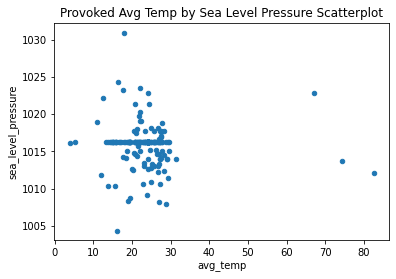

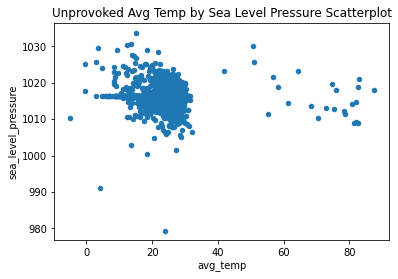

In [78]:
shark_data_prov.plot(kind='scatter', x="avg_temp", y="sea_level_pressure")
plt.title("Provoked Avg Temp by Sea Level Pressure Scatterplot")
plt.savefig("img/unnormalized_prov_shark_scatterplots_temp_pressure")
shark_data_unprov.plot(kind='scatter', x="avg_temp", y="sea_level_pressure")
plt.title("Unprovoked Avg Temp by Sea Level Pressure Scatterplot")
plt.savefig("img/unnormalized_unprov_shark_scatterplots_temp_pressure")